In [35]:


import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os


In [36]:

sys.path.append("..")  

from my_linear_reg import myLinearReg
from data_split import train_test_split

In [37]:
df = pd.read_csv("temperature_icecream_data.csv")
df = df.rename(columns={"Temperature_C": "temp", "Ice_Cream_Sales": "sales"})
df.head()

,temp,sales
0,27.49,325.59
1,39.01,430.37
2,34.64,428.56
3,31.97,379.24
4,23.12,250.83


In [38]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    300 non-null    float64
 1   sales   300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


,temp,sales
count,300.000000,300.000000
mean,29.903833,348.827800
std,5.886630,61.825202
min,20.100000,231.140000
25%,24.780000,296.702500
50%,30.235000,351.760000
75%,35.137500,400.165000
max,39.800000,469.900000


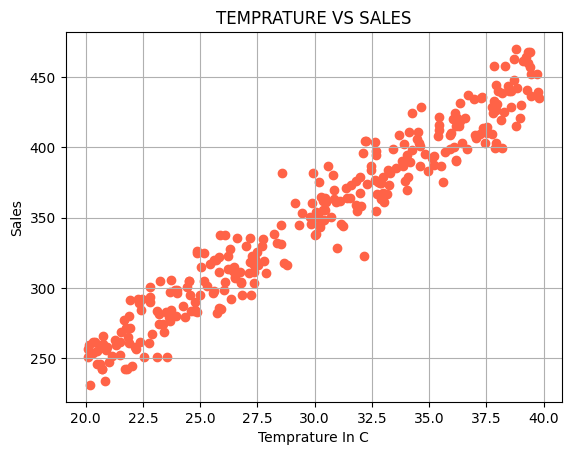

In [39]:
plt.scatter(x=df["temp"], y=df["sales"], color="tomato", marker="o")
plt.xlabel("Temprature In C")
plt.ylabel("Sales")
plt.title("TEMPRATURE VS SALES")
plt.grid(True)
plt.show()

In [40]:
X = df[["temp"]].values
y = df[["sales"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [41]:
model = myLinearReg()
model.fit(X_train, y_train)

In [42]:
y_pred = model.predict(X_test)

In [43]:
metrics = model.metrics(y_test, y_pred)

In [44]:
print(" Regression Metrics:")
print(f"Mean Squared Error (MSE): {metrics['MSE']:.4f}")
print(f"Mean Absolute Error (MAE): {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")


 Regression Metrics:
Mean Squared Error (MSE): 254.1520
Mean Absolute Error (MAE): 12.4950
R² Score: 0.9360


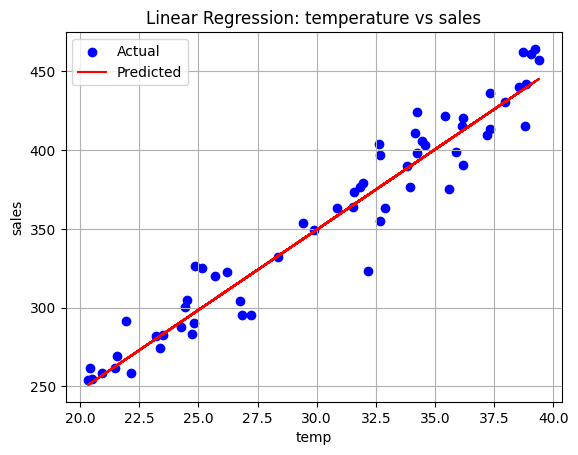

In [45]:
# Plotting
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")

plt.xlabel("temp")
plt.ylabel("sales")
plt.title("Linear Regression: temperature vs sales")
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Saving the model
with open("icecream_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as 'icecream_model.pkl'")


Model saved as 'icecream_model.pkl'


In [47]:
# Load and predict
with open("icecream_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print(loaded_model.predict([[28]]))  # Same prediction for temp = 25

[[329.02498789]]
